# Coffee Roast Classification Neural Network

 we'll build a small neural network using TensorFlow to classify coffee roasts. We'll generate our own data, preprocess it, build and train a model, and visualize the results.

## 1. Setup and Data Generation

First, let's import the necessary libraries and generate our coffee roasting data.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Normalization
import logging

# Suppress TensorFlow warnings
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Custom style settings
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 14
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Generate coffee roasting data
def generate_coffee_data(num_samples=1000):
    temperature = np.random.uniform(175, 260, num_samples)
    duration = np.random.uniform(12, 15, num_samples)

    X = np.column_stack((temperature, duration))

    # Define the decision boundary
    y = ((temperature - 220) / 40 + (duration - 13.5) / 1.5 + np.random.normal(0, 0.1, num_samples)) > 0

    return X, y.astype(int).reshape(-1, 1)

# Generate the data
X, y = generate_coffee_data()

print(f"Generated data shape: X: {X.shape}, y: {y.shape}")

Generated data shape: X: (1000, 2), y: (1000, 1)


<ipython-input-1-a66c0895cc08>:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


## Data Visualization

Let's visualize our generated coffee roasting data.


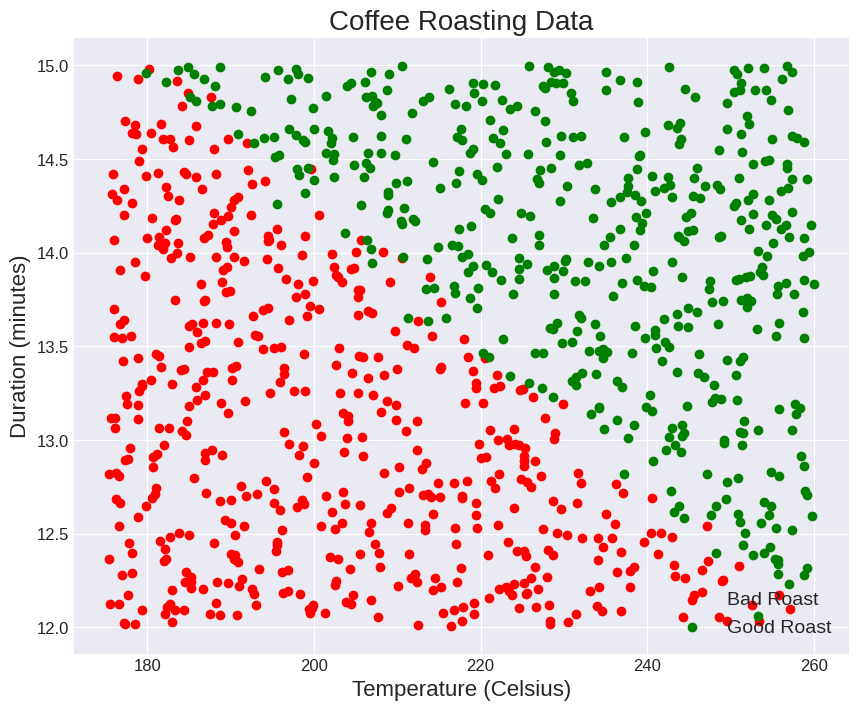

In [2]:
plt.figure(figsize=(10, 8))
plt.scatter(X[y[:, 0] == 0, 0], X[y[:, 0] == 0, 1], c='r', label='Bad Roast')
plt.scatter(X[y[:, 0] == 1, 0], X[y[:, 0] == 1, 1], c='g', label='Good Roast')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Duration (minutes)')
plt.title('Coffee Roasting Data')
plt.legend()
plt.show()

## Data Preprocessing

Now, let's normalize our input data to improve the training process.


In [3]:
# Create and adapt normalization layer
norm_layer = Normalization(axis=-1)
norm_layer.adapt(X)

# Normalize the data
X_normalized = norm_layer(X)

print("Before normalization:")
print(f"Temperature range: [{X[:, 0].min():.2f}, {X[:, 0].max():.2f}]")
print(f"Duration range: [{X[:, 1].min():.2f}, {X[:, 1].max():.2f}]")

print("\nAfter normalization:")
print(f"Temperature range: [{tf.reduce_min(X_normalized[:, 0]):.2f}, {tf.reduce_max(X_normalized[:, 0]):.2f}]") # Use tf.reduce_min and tf.reduce_max
print(f"Duration range: [{tf.reduce_min(X_normalized[:, 1]):.2f}, {tf.reduce_max(X_normalized[:, 1]):.2f}]") # Use tf.reduce_min and tf.reduce_max

Before normalization:
Temperature range: [175.39, 259.98]
Duration range: [12.01, 15.00]

After normalization:
Temperature range: [-1.66, 1.74]
Duration range: [-1.73, 1.69]


## Model Creation

Let's build our neural network model for coffee roast classification.


In [4]:
model = Sequential([
    tf.keras.Input(shape=(2,)),
    Dense(3, activation='sigmoid', name='hidden_layer'),
    Dense(1, activation='sigmoid', name='output_layer')
])

# Display model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)                 │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

## Model Compilation and Training

We'll compile the model with an appropriate loss function and optimizer, then train it on our data.


In [5]:
# Compile the model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_normalized, y,
    epochs=100,
    validation_split=0.2,
    verbose=1
)



Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.4984 - loss: 0.8660 - val_accuracy: 0.4450 - val_loss: 0.7199
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5090 - loss: 0.6420 - val_accuracy: 0.5700 - val_loss: 0.5935
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6756 - loss: 0.5554 - val_accuracy: 0.7750 - val_loss: 0.5363
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8061 - loss: 0.5097 - val_accuracy: 0.8700 - val_loss: 0.4920
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8734 - loss: 0.4684 - val_accuracy: 0.8750 - val_loss: 0.4499
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8939 - loss: 0.4280 - val_accuracy: 0.9250 - val_loss: 0.4099
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9177 - loss: 0.3900 - val_accuracy: 0.9550 - val_loss: 0.3731
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9309 - loss: 0.3554 - val_accuracy: 0.960

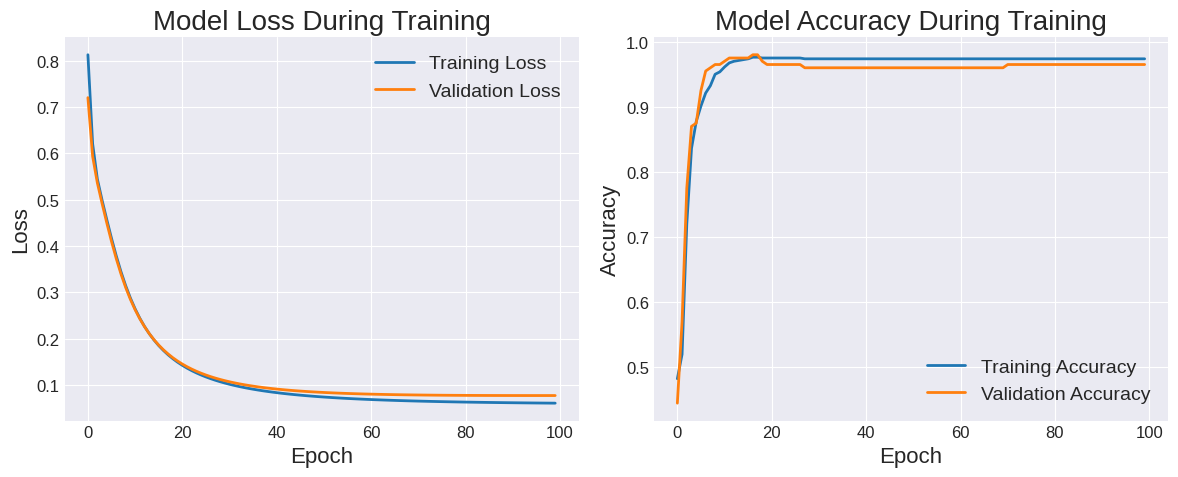

In [6]:
# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy During Training')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

## Model Evaluation

Let's examine the trained weights and make some predictions.


In [7]:
# Get trained weights
W1, b1 = model.get_layer("hidden_layer").get_weights()
W2, b2 = model.get_layer("output_layer").get_weights()

print("Hidden layer weights:\n", W1)
print("Hidden layer biases:", b1)
print("\nOutput layer weights:\n", W2)
print("Output layer biases:", b2)

# Make predictions on test data
X_test = np.array([
    [200, 13.5],  # should be close to decision boundary
    [240, 14.5],  # likely a bad roast
    [220, 13.5]   # likely a good roast
])
X_test_norm = norm_layer(X_test)
predictions = model.predict(X_test_norm)

print("\nPredictions:")
for i, pred in enumerate(predictions):
    print(f"Sample {i+1}: {pred[0]:.4f} - {'Good' if pred[0] >= 0.5 else 'Bad'} Roast")

Hidden layer weights:
 [[3.663818  4.674949  4.154595 ]
 [3.4205132 4.4407907 3.9164693]]
Hidden layer biases: [-1.015582   -0.93348205 -0.9634483 ]

Output layer weights:
 [[3.548699 ]
 [5.86972  ]
 [4.5188613]]
Output layer biases: [-5.477464]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step

Predictions:
Sample 1: 0.0055 - Bad Roast
Sample 2: 0.9998 - Good Roast
Sample 3: 0.4544 - Bad Roast


## Visualizing Decision Boundary

Finally, let's visualize the decision boundary of our trained model.


132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


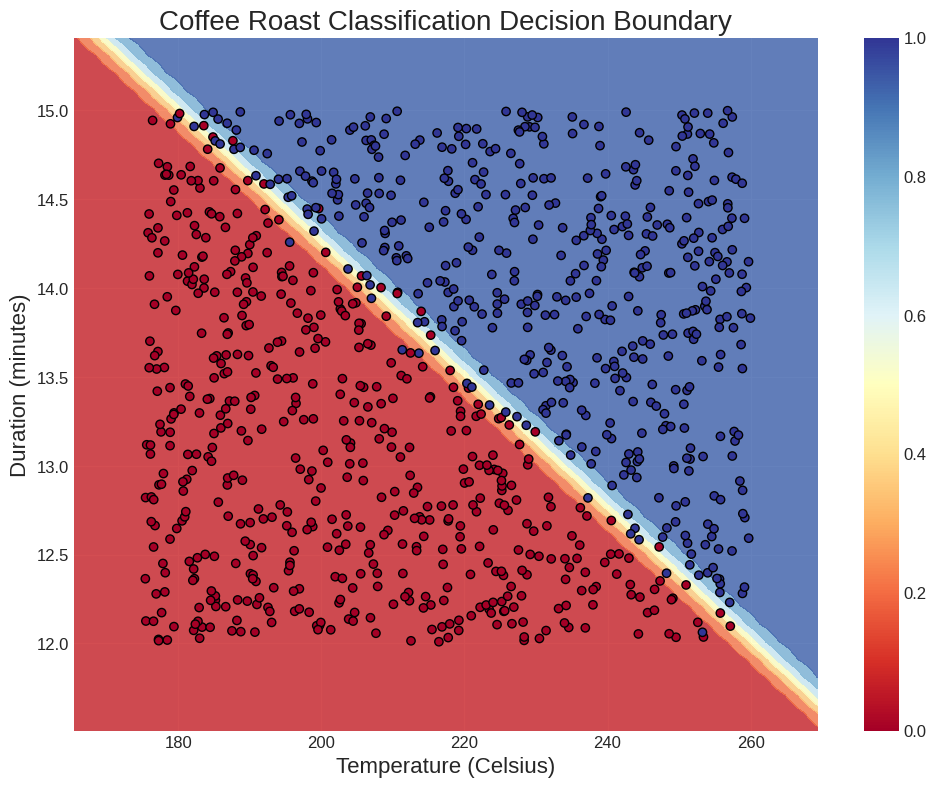

In [8]:
def plot_decision_boundary(X, y, model, norm_layer):
    x_min, x_max = X[:, 0].min() - 10, X[:, 0].max() + 10
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict(norm_layer(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(12, 9))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y.reshape(-1), cmap=plt.cm.RdYlBu, edgecolor='black')
    plt.xlabel("Temperature (Celsius)")
    plt.ylabel("Duration (minutes)")
    plt.title("Coffee Roast Classification Decision Boundary")
    plt.colorbar()
    plt.show()

plot_decision_boundary(X, y, model, norm_layer)

In [10]:
# Print final training and validation loss and accuracy
print("Final Training Loss:", history.history['loss'][-1])
print("Final Validation Loss:", history.history['val_loss'][-1])
print("Final Training Accuracy:", history.history['accuracy'][-1])
print("Final Validation Accuracy:", history.history['val_accuracy'][-1])

# Calculate and print additional metrics
y_pred = (model.predict(X_normalized) > 0.5).astype(int)
from sklearn.metrics import confusion_matrix, classification_report
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred))


Final Training Loss: 0.0611482709646225
Final Validation Loss: 0.07758602499961853
Final Training Accuracy: 0.9737499952316284
Final Validation Accuracy: 0.9649999737739563
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Confusion Matrix:
 [[513  12]
 [ 16 459]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       525
           1       0.97      0.97      0.97       475

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



# Coffee Roast Classification Model Performance Report

## Model Performance Metrics

Our coffee roast classification model has shown excellent performance on both the training and validation datasets. Here's a summary of the key metrics:

- **Final Training Loss**: 0.0611
- **Final Validation Loss**: 0.0776
- **Final Training Accuracy**: 97.37%
- **Final Validation Accuracy**: 96.50%

These metrics indicate that our model has learned to classify coffee roasts with high accuracy while maintaining good generalization, as evidenced by the close alignment between training and validation metrics.

## Confusion Matrix

The confusion matrix provides insight into the model's classification performance:

```
[[513  12]
 [ 16 459]]
```

This matrix shows that:
- 513 bad roasts were correctly classified (True Negatives)
- 459 good roasts were correctly classified (True Positives)
- 12 bad roasts were incorrectly classified as good (False Positives)
- 16 good roasts were incorrectly classified as bad (False Negatives)

## Classification Report

The classification report provides a detailed breakdown of the model's performance:

```
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       525
           1       0.97      0.97      0.97       475

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000
```

### Interpretation:

- **Class 0 (Bad Roast)**:
  - Precision: 0.97
  - Recall: 0.98
  - F1-score: 0.97
- **Class 1 (Good Roast)**:
  - Precision: 0.97
  - Recall: 0.97
  - F1-score: 0.97

The model shows consistent performance across both classes, with high precision, recall, and F1-scores. This indicates that it's equally effective at identifying both good and bad coffee roasts.

## Conclusion

Our coffee roast classification model demonstrates exceptional performance, with an overall accuracy of 97%. It shows balanced performance across both classes, indicating its reliability in classifying both good and bad coffee roasts. The close alignment between training and validation metrics suggests good generalization, meaning the model should perform well on new, unseen data.

This model can be confidently used to assist in the coffee roasting process, helping to ensure consistent quality in coffee production.